## Market_Data_Analysis_with_yfinance

### Let's import yfinance as yf and query data for the company Tesla using the identifying ticker "TSLA".

In [6]:
import yfinance as yf
stock_info = yf.Ticker('TSLA').info
# stock_info.keys() for other properties you can explore
market_price = stock_info['regularMarketPrice']
previous_close_price = stock_info['regularMarketPreviousClose']
print('market price ', market_price)
print('previous close price ', previous_close_price)

market price  1087.74
previous close price  1054.73


## Your output should show printed numberical outputs for both the "market price" and the "previous close price".

## Now, let us import pandas as pd to form a data-frame (df) so that we may easily interpret and view our data. Let us pull some data for Microsoft (MSFT).

In [9]:
import pandas as pd

#define the ticker symbol
tickerSymbol = 'MSFT' #MSFT is Microsoft

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2021-05-31')

#see your data
tickerDf #or just tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,23.693362,24.064779,23.670148,23.948711,38409100,0.0,0
2010-01-05,23.871343,24.064790,23.708847,23.956459,49749600,0.0,0
2010-01-06,23.894556,24.049314,23.615994,23.809441,58182400,0.0,0
2010-01-07,23.701105,23.755272,23.360640,23.561825,50559700,0.0,0
2010-01-08,23.430277,23.894548,23.399325,23.724316,51197400,0.0,0
...,...,...,...,...,...,...,...
2021-05-24,247.316535,250.680106,247.037071,250.300827,21411500,0.0,0
2021-05-25,251.288936,252.267060,250.340755,251.239029,17704300,0.0,0
2021-05-26,250.949578,252.456702,250.270884,251.009476,17771600,0.0,0


## Next, we plot some of our data utilizing matplotlib.pyplot.

Date
2010-01-04     23.948711
2010-01-05     23.956459
2010-01-06     23.809441
2010-01-07     23.561825
2010-01-08     23.724316
                 ...    
2021-05-24    250.300827
2021-05-25    251.239029
2021-05-26    251.009476
2021-05-27    248.833633
2021-05-28    249.202911
Name: Close, Length: 2871, dtype: float64


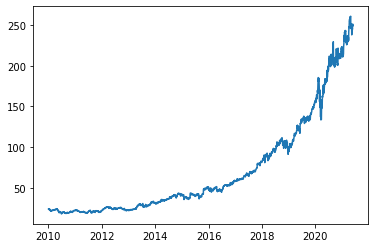

In [11]:
import matplotlib.pyplot as plt
mylist=tickerDf['Close']
print(mylist)
plt.plot(mylist)

## We now have a pretty powerful tool to pull market data for any company.

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.251434,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.643717,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.181011,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.202667,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.320068,283192000


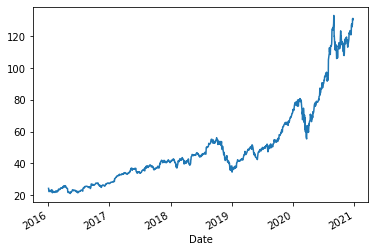

In [13]:
#Alternative method from: https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2020-12-25')

# Plot the close price of the AAPL
data['Adj Close'].plot()
data.head()

## First attempt at thinking about a basic model from historical data. Pull the adjusted close price over a given period. Starting from day 0, if tomorrow's data is better by a given percentage, thenbuy stock. If it is lower, do not buy, et cetera...

Date
2016-01-04     24.251434
2016-01-05     23.643717
2016-01-06     23.181011
2016-01-07     22.202667
2016-01-08     22.320068
                 ...    
2020-12-18    125.883957
2020-12-21    127.444328
2020-12-22    131.071976
2020-12-23    130.157608
2020-12-24    131.161423
Name: Adj Close, Length: 1255, dtype: float64
[23.346759796142578, 23.972627639770508, 30.297513961791992, 48.562557220458984, 38.14426803588867, 40.10523986816406, 73.78380584716797, 70.45771026611328, 68.63787841796875, 60.96095657348633, 63.81542205810547, 64.81053161621094, 70.87995147705078, 105.23731231689453, 123.39509582519531, 123.42485809326172, 127.09647369384766]


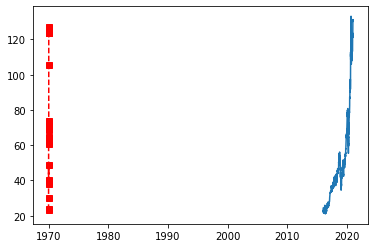

In [22]:
import numpy as np

x=[]
y=[]
mylist=data['Adj Close']
print(mylist)
plt.plot(mylist)

# for b,c, in zip(mylist, mylist[1:]):
#     if c > 1.05*b:
#         x.append(c)
#     elif c > 1.03*b:
#         y.append(c)

# data['NJC_Model'] = pd.Series(np.array(x))
# print(x)
# plt.plot(x, 's--r')

#for i in x:
    #y.append(i*1.05)
#plt.plot(y)

#plt.plot(y, 's--b')
#data['NJC_Model'] = x
#pd.set_option('display.max_rows', None)
#data['NJC_Model']

#data['NJC_Model'].plot()
#data['Adj Close'].plot()
#plt.show()

[23.346759796142578, 23.972627639770508, 30.297513961791992, 48.562557220458984, 38.14426803588867, 40.10523986816406, 73.78380584716797, 70.45771026611328, 68.63787841796875, 60.96095657348633, 63.81542205810547, 64.81053161621094, 70.87995147705078, 105.23731231689453, 123.39509582519531, 123.42485809326172, 127.09647369384766]


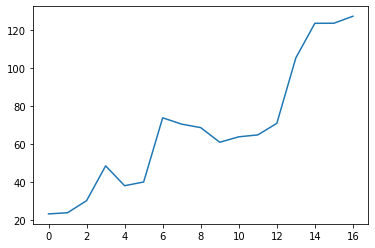

In [19]:
print(x)
plt.plot(x)

[22.407546997070312, 23.267452239990234, 21.860614776611328, 26.16741943359375, 27.057071685791016, 37.291866302490234, 38.84635925292969, 38.981231689453125, 39.06333541870117, 41.53135681152344, 41.47852325439453, 42.39083480834961, 44.133811950683594, 53.7174186706543, 50.776512145996094, 43.91312026977539, 44.854774475097656, 35.98186111450195, 38.287452697753906, 43.60423278808594, 47.5503044128418, 51.31114196777344, 43.95321273803711, 51.323760986328125, 54.91447830200195, 78.54578399658203, 74.75422668457031, 62.43757629394531, 71.04788208007812, 85.16981506347656, 112.80624389648438, 112.12413787841797, 128.0284881591797, 133.12818908691406, 116.40035247802734, 109.21711730957031, 111.39986419677734, 115.5867919921875, 114.4160385131836, 114.04894256591797, 118.09695434570312, 118.75788116455078, 121.96809387207031]


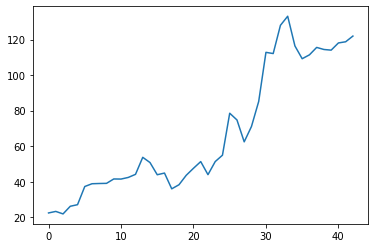

In [21]:
print(y)
plt.plot(y)

## Other methods to plot lists of companies/stocks (stonks!!).

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
                 QYLD       SDIV         VGT         VYM
Date                                                    
2021-06-07  21.395939  14.102867  374.834198  106.088371
2021-06-08  21.405508  14.180249  375.491760  105.901100
2021-06-09  21.395939  14.228613  375.292480  105.536446
2021-06-10  21.434210  14.238285  378.670013  105.713852
2021-06-11  21.472486  14.218941  380.991425  105.782845


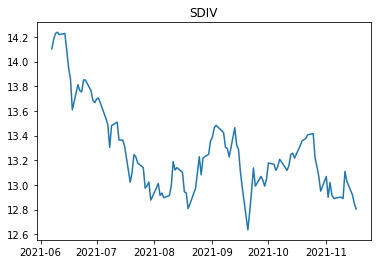

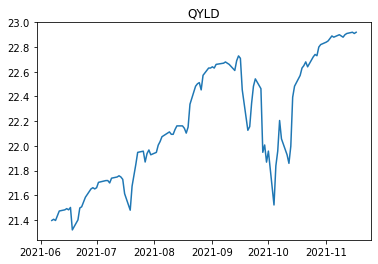

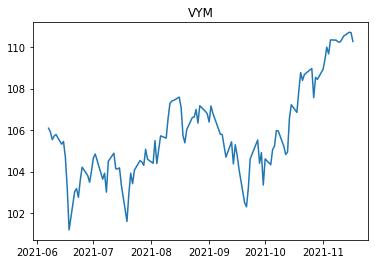

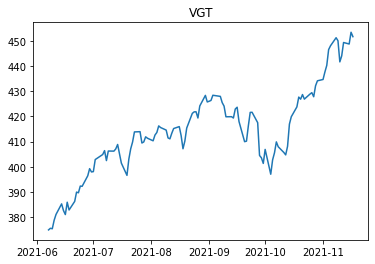

In [31]:
# Define the ticker list
tickers_list = ['SDIV', 'QYLD', 'VYM', 'VGT']#, 'BA', 'AXP']
# Fetch the data
data = yf.download(tickers_list,'2021-06-5')['Adj Close']
data2 = yf.download(tickers_list, period="5d", interval="1m")['Adj Close']
# Print first 5 rows of the data
print(data.head()) #or return full 'data'
#now plot tickers_list data in individual plots
for i in tickers_list:
    plt.figure(i)
    plt.plot(data[i])
    plt.title(i)

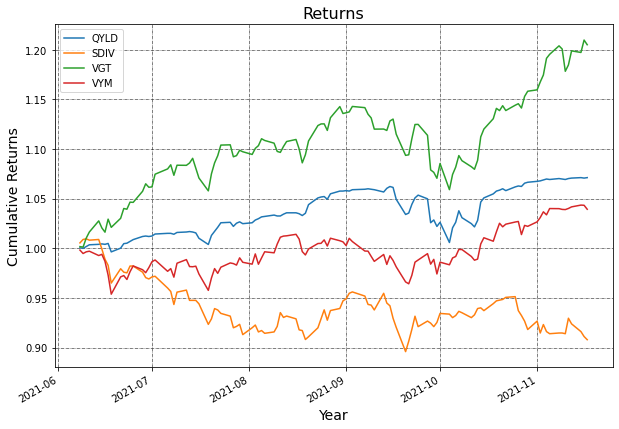

In [32]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Returns", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Other plots...

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-11-17 15:35:00-05:00  110.241997  110.250000  110.220100  110.239998   
2021-11-17 15:36:00-05:00  110.259499  110.269997  110.259499  110.263298   
2021-11-17 15:37:00-05:00  110.251701  110.257004  110.250000  110.250000   
2021-11-17 15:38:00-05:00  110.250000  110.279999  110.250000  110.279999   
2021-11-17 15:39:32-05:00  110.269997  110.269997  110.269997  110.269997   

                            Adj Close  Volume  
Datetime                                       
2021-11-17 15:35:00-05:00  110.239998    4765  
2021-11-17 15:36:00-05:00  110.263298    3622  
2021-11-17 15:37:00-05:00  110.250000    4645  
2021-11-17 15:38:00-05:00  110.279999    2272  
2021-11-17 15:39:32-05:00  110.269997       0  


<AxesSubplot:xlabel='Datetime'>

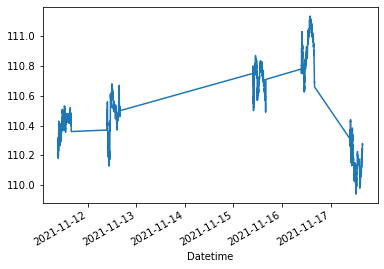

In [33]:
# Get the data for Vanguard VYM
data = yf.download(tickers="VYM", period="5d", interval="1m")

# Print the data
print(data.tail())
#data
data['Close'].plot()

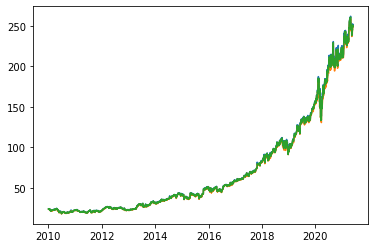

In [34]:
#plot all historical high, low, and close data for VYM
plt.plot(tickerDf['High'])
plt.plot(tickerDf['Low'])
plt.plot(tickerDf['Close'])

## Recommendation data from yfinance

In [35]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#info on the company
tickerData.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [36]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get event data for ticker
tickerData.calendar

,0,1
Earnings Date,2022-01-24 10:59:00,2022-01-28 12:00:00
Earnings Average,2.31,2.31
Earnings Low,2.27,2.27
Earnings High,2.46,2.46
Revenue Average,50826500000,50826500000
Revenue Low,50536700000,50536700000
Revenue High,51555000000,51555000000


In [37]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get recommendation data for ticker
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-10-27 12:37:42,Credit Suisse,Outperform,,main
2021-10-27 13:41:53,Barclays,Overweight,,main
2021-10-27 13:56:33,Morgan Stanley,Overweight,,main
